In [47]:
from typing import TypedDict, Literal

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    target_currency: Literal['INR', 'EUR']
    total: float


In [48]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd']*1.08
    return state
def convert_eur(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd']*90
    return state
def convert_inr(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd']*85
    return state
def choose_conversion(state: PortfolioState) -> PortfolioState:
    return state['target_currency']

In [49]:
from langgraph.graph import StateGraph, START, END
builder = StateGraph(PortfolioState)

builder.add_node('calc_total_node', calc_total)
builder.add_node('convert_inr_amount_node', convert_inr)
builder.add_node('convert_eur_amount_node', convert_eur)

builder.add_edge(START, 'calc_total_node')
builder.add_conditional_edges(
    'calc_total_node',
    choose_conversion,
    {
        'INR': 'convert_inr_amount_node', 'EUR': 'convert_eur_amount_node'
    }
)
builder.add_edge(['convert_inr_amount_node', 'convert_eur_amount_node'], END)
graph = builder.compile()

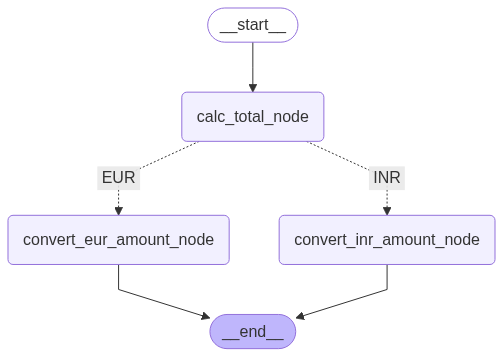

In [50]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [51]:
graph.invoke({'amount_usd': 100, 'target_currency': 'EUR'})

{'amount_usd': 100,
 'total_usd': 108.0,
 'target_currency': 'EUR',
 'total': 9720.0}